In [ ]:
pip install imdbpy

In [ ]:
from google.colab import drive
import pandas as pd
from imdb import IMDb
import matplotlib.pyplot as plt
import matplotlib
import imdb 
import json
import numpy as np
# This will prompt for authorization.
import seaborn as sns
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1  import Features, EntitiesOptions, KeywordsOptions, SentimentOptions, CategoriesOptions

In [ ]:
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Projects/game_of_thrones

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Projects/game_of_thrones


In [ ]:
ia = IMDb()

In [ ]:
#Importing Jason File

f = open("episode-character.json") 
data = json.load(f)
f.close() 

In [ ]:
# creating instance of IMDb 
ia = imdb.IMDb() 
  
# id 
gameOfThrones = ia.get_movie('0944947')
  
# adding new info set 
ia.update(gameOfThrones, 'episodes') 
  
# getting episodes of the series 
episodes = gameOfThrones.data['episodes'] 


In [ ]:
episode_names = []
for i in episodes.keys(): 
    # getting total episode in season i 
    n = len(episodes[i]) 
    for j in range(1,n+1):
      text = "Season " + str(i) +"," + "Episode " + str(j)
      episode_names.append(text) 

In [ ]:
df = pd.read_json("episode-character.json")
df_groups = pd.read_json("characters-groups.json")
df.drop(['slope','intercept'],inplace=True,axis=1)
df.tail()

name                                               data
572  Dornish Lord  [{'x': 0, 'y': 0}, {'x': 1, 'y': 0}, {'x': 2, ...
573       Lord #1  [{'x': 0, 'y': 0}, {'x': 1, 'y': 0}, {'x': 2, ...
574       Lord #2  [{'x': 0, 'y': 0}, {'x': 1, 'y': 0}, {'x': 2, ...
575       Lord #3  [{'x': 0, 'y': 0}, {'x': 1, 'y': 0}, {'x': 2, ...
576       Lord #4  [{'x': 0, 'y': 0}, {'x': 1, 'y': 0}, {'x': 2, ...

In [ ]:
char_names =list(df.iloc[:,0])

In [ ]:
screen_time = []
char_time = []
for i in range(len(df)):
  char_time = []
  for j in range(len(seasons)):
    episode_time = int((df.data[i][j]['y'])/60)
    char_time.append(episode_time)
  screen_time.append(char_time)

In [ ]:
screen_times=np.array([np.array(xi) for xi in screen_time])

In [ ]:
screen_times

array([[ 6,  0,  0, ...,  0,  0,  0],
       [ 5,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0, 12],
       [ 0,  0,  0, ...,  0,  0, 12],
       [ 0,  0,  0, ...,  0,  0, 12]])

In [ ]:
df_times = pd.DataFrame(screen_times, columns=episode_names, index=char_names)

In [ ]:
df_times = df_times.cumsum(axis = 1)

In [ ]:
df_times.head()

Season 1,Episode 1  ...  Season 8,Episode 6
Gared                                 6  ...                   6
Waymar Royce                          5  ...                   5
Will                                 12  ...                  12
Wight Wildling Girl                   0  ...                   0
White Walker                          1  ...                  19

[5 rows x 73 columns]

In [ ]:
df_times = df_times.reset_index().rename(columns={'index': 'name'})

In [ ]:
df_times.head()

name  ...  Season 8,Episode 6
0                Gared  ...                   6
1         Waymar Royce  ...                   5
2                 Will  ...                  12
3  Wight Wildling Girl  ...                   0
4         White Walker  ...                  19

[5 rows x 74 columns]

In [ ]:
mapper = {}
for i in range(len(df_groups)):
  for j in df_groups.groups[i]['characters']:
    mapper[j] = df_groups.groups[i]['name']

In [ ]:
df_times["houses"] = df_times["name"].map(mapper)

In [ ]:
df_times["houses"].fillna("none",inplace=True)

In [ ]:
df_times["houses"].nunique()

15

In [ ]:
houses = []
for i in range(len(df_groups)):
  houses.append(df_groups.groups[i]['name'])
houses.append("none")
len(houses)

15

In [ ]:
houses

['Stark',
 'Targaryen',
 'Baratheon',
 'Lannister',
 "Night's Watch",
 'Dothraki',
 'Greyjoy',
 'Tyrell',
 'Wildlings',
 'Martell',
 'Frey',
 'Tully',
 'White Walkers',
 'Include',
 'none']

In [ ]:
import random
color_list = ['#7FFFD4','#E9967A','#7FFFD4','#e65c00','#ffcc99','#e0e0eb','#669999','#d98c8c','#f2f2f2','#cc6666','#7FFFD4','#E9967A','#7FFFD4','#BA55D3','#ffcc99']
#color_list = random.sample(list(matplotlib.colors.cnames.values()),15)
len(color_list)

15

In [ ]:
s = df_times.loc[:,['name','Season 1,Episode 1']].sort_values(by='Season 1,Episode 1', ascending=False).head(10)

In [ ]:
s

name  Season 1,Episode 1
8         Eddard Stark                  26
13       Theon Greyjoy                  19
14       Rodrik Cassel                  18
9        Catelyn Stark                  18
5             Jon Snow                  18
6           Bran Stark                  18
7           Robb Stark                  14
25     Jaime Lannister                  14
35  Daenerys Targaryen                  13
24    Cersei Lannister                  13

<BarContainer object of 10 artists>

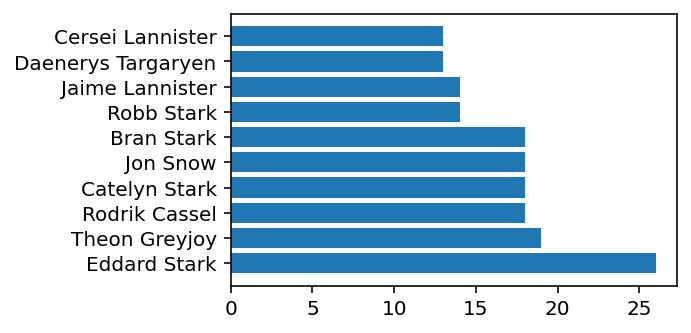

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
#colors = plt.cm.Dark2(range(11))
ax.barh(s['name'],s['Season 1,Episode 1'])

In [ ]:
colors = dict(zip(houses,color_list))
colors

{'Baratheon': '#7FFFD4',
 'Dothraki': '#e0e0eb',
 'Frey': '#7FFFD4',
 'Greyjoy': '#669999',
 'Include': '#BA55D3',
 'Lannister': '#e65c00',
 'Martell': '#cc6666',
 "Night's Watch": '#ffcc99',
 'Stark': '#7FFFD4',
 'Targaryen': '#E9967A',
 'Tully': '#E9967A',
 'Tyrell': '#d98c8c',
 'White Walkers': '#7FFFD4',
 'Wildlings': '#f2f2f2',
 'none': '#ffcc99'}

In [ ]:
group_lk = df_times.set_index('name')['houses'].to_dict()

In [ ]:
s = s[::-1] 

In [ ]:
current_episode = 'Season 1,Episode 1'

In [ ]:
s

name  Season 1,Episode 1
24    Cersei Lannister                  13
35  Daenerys Targaryen                  13
25     Jaime Lannister                  14
7           Robb Stark                  14
6           Bran Stark                  18
5             Jon Snow                  18
9        Catelyn Stark                  18
14       Rodrik Cassel                  18
13       Theon Greyjoy                  19
8         Eddard Stark                  26

Text(1, 0.2, 'Season 1,Episode 1')

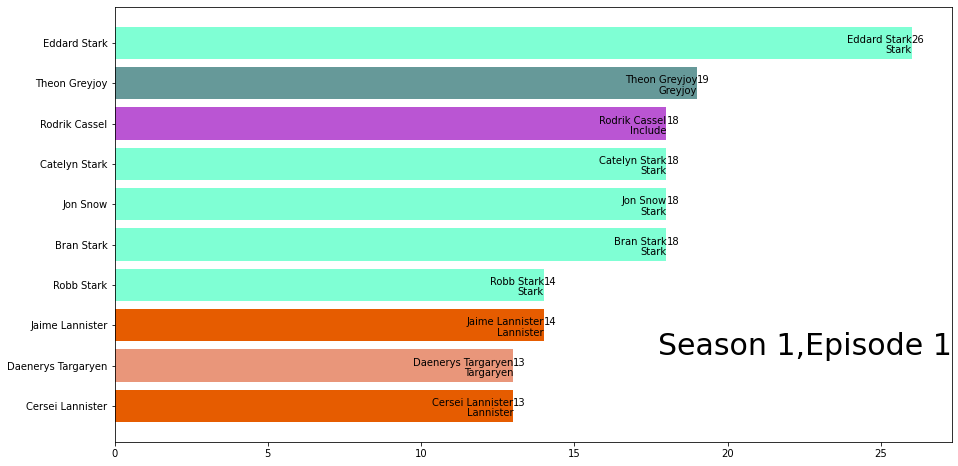

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
# flip values from top to bottom
# pass colors values to `color=`
ax.barh(s['name'], s[current_episode], color=[colors[group_lk[x]] for x in s['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(s[current_episode], s['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.2, current_episode, transform=ax.transAxes, size=30, ha='right')

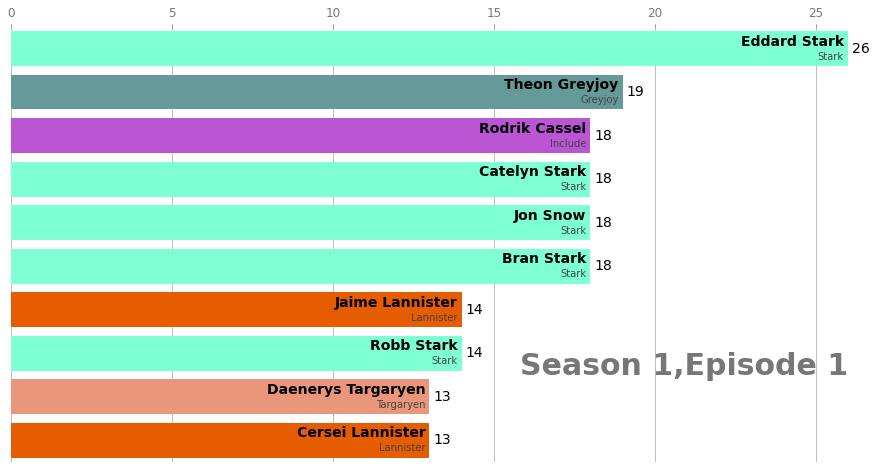

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(episode):
    s = df_times.loc[:,['name',episode]].sort_values(by=episode, ascending=True).tail(10)
    #dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(s['name'], s[episode],color=[colors[group_lk[x]] for x in s['name']])
    dx = s[episode].max() / 200
    for i, (value, name) in enumerate(zip(s[episode], s['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.2, episode, transform=ax.transAxes, color='#777777', size=30, ha='right', weight=800)
    #ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    #ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    # ax.text(0, 1.12, 'The most populous cities in the world from 1500 to 2018',
    #         transform=ax.transAxes, size=24, weight=600, ha='left')
    # ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
    #         color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(current_episode)

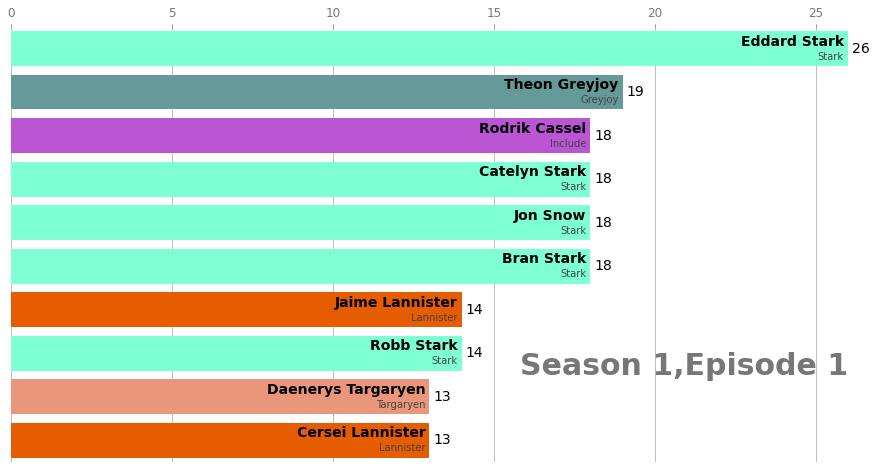

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=seasons, interval =175)
HTML(animator.to_jshtml())

In [ ]:
#Dictionary with all episode information
episode_info = gameOfThrones.data['episodes'] 

In [ ]:
#Get each episode id and store in episode_id
episode_id = []
for i in episode_info.keys(): 
    # getting total episode in season i 
    n = len(episodes[i]) 
    for j in range(1,n+1):
      episode_id.append(episode_info[i][j].getID()) 

In [ ]:
episode_rating = []
episodes = gameOfThrones.data['episodes'] 
for i in episode_info.keys(): 
  get_season = episodes[i]
  # getting total episode in season i 
  n = len(episodes[i]) 
  for j in range(1,n+1):
    get_episode = get_season[j]
    episode_rating.append(get_episode.data['rating']) 

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid')/ w

In [ ]:
mv = moving_average(np.array(episode_rating), 2)

In [ ]:
mv = np.insert(mv, 0, 8.95123457, axis=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]), <a list of 73 Text major ticklabel objects>)

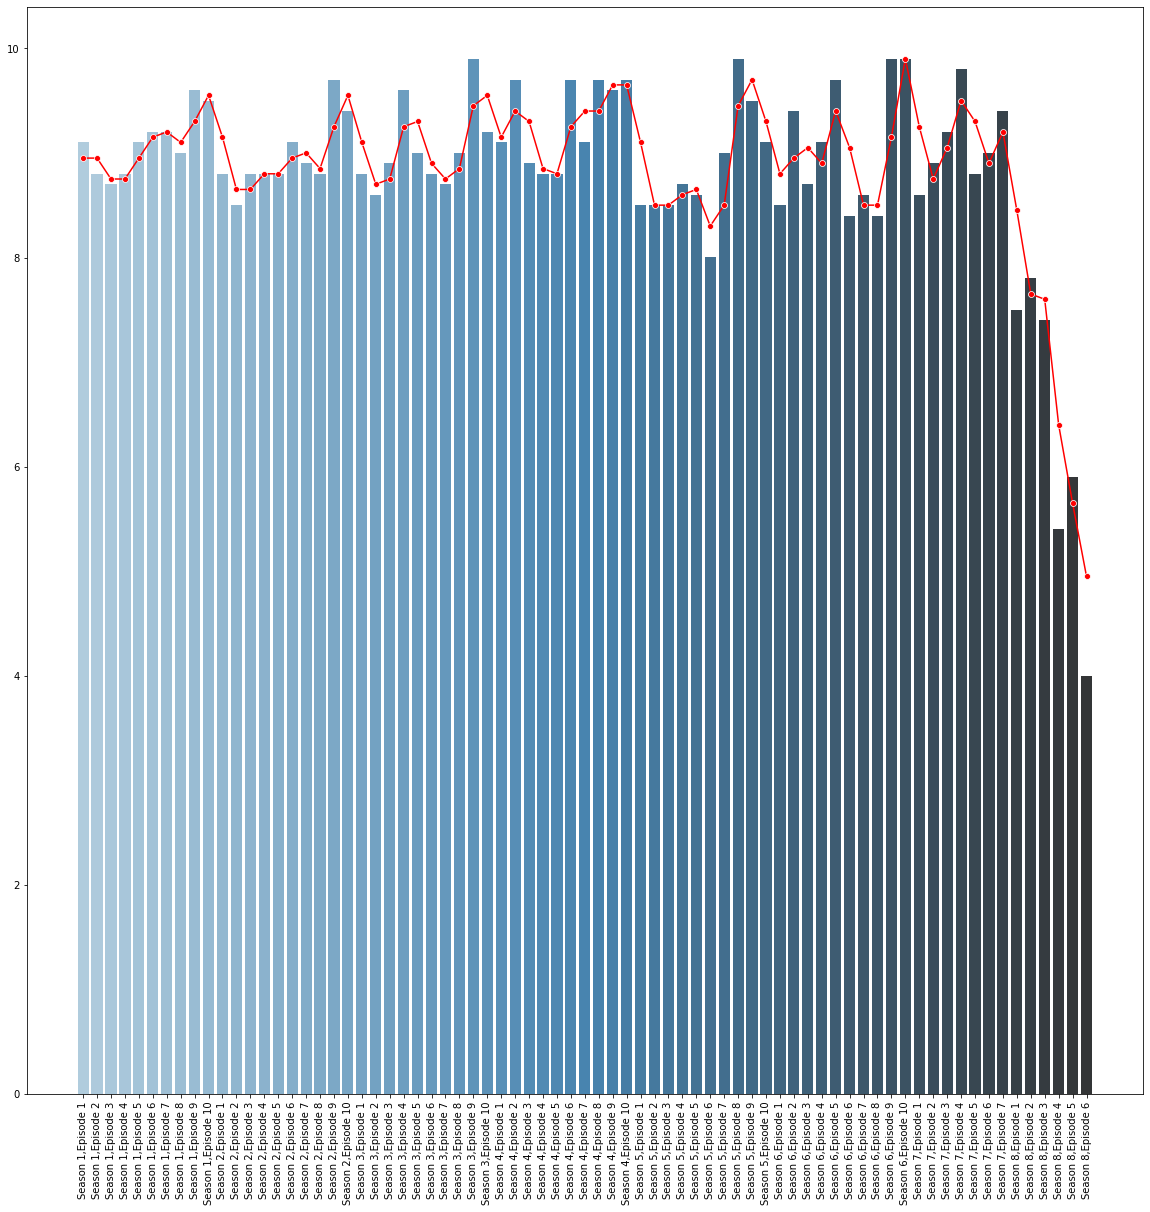

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

sns.barplot(x=episode_names,y=episode_rating,palette="Blues_d")
# ax.xaxis.set_major_locator(ticker.AutoLocator())
# ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
sns.lineplot(x=episode_names,y=mv, color='r',marker='o')
plt.xticks(rotation=90)

In [ ]:
episode_reviews = {}
for i,id in enumerate(episode_id):
  episode_review = []
  for j in range(25):
    try:
      episode_review.append(ia.get_movie_reviews(id)['data']['reviews'][j]['content'])
    except IndexError:
      pass
  episode_reviews[episode_names[i]] = episode_review

1480055
1668746
1829962
1829963
1829964
1837862
1837863
1837864
1851398
1851397
1971833
2069318
2070135
2069319
2074658
2085238
2085239
2085240
2084342
2112510
2178782
2178772
2178802
2178798
2178788
2178812
2178814
2178806
2178784
2178796
2816136
2832378
2972426
2972428
3060856
3060910
3060876
3060782
3060858
3060860
3658012
3846626
3866836
3866838
3866840
3866842
3866846
3866850
3866826
3866862
3658014
4077554
4131606
4283016
4283028
4283054
4283060
4283074
4283088
4283094
5654088
5655178
5775840
5775846
5775854
5775864
5775874
5924366
6027908
6027912
6027914
6027916
6027920


In [ ]:
df = {}
for key in episode_reviews.keys():
  df[key] = pd.DataFrame(episode_reviews[key])

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
def analyze_text(text_data,analyzer):
    if analyzer == 'VADER':
        result = analyser.polarity_scores(text_data)
        score = result['compound']
    else: 
        score = TextBlob(text_data).sentiment.polarity

    if score > 0:
        result = 1
    else:
        result = 0
    return result

In [ ]:
for key in episode_reviews.keys():
  df[key]['vader'] = df[key][0].apply(analyze_text, analyzer='VADER')

In [ ]:
vader_modes = []
for key in episode_reviews.keys():
  vader_modes.append(df[key]['vader'].mode()[0])

In [ ]:
actual_setiment = [0 if x < 8.5 else 1 for x in episode_rating]

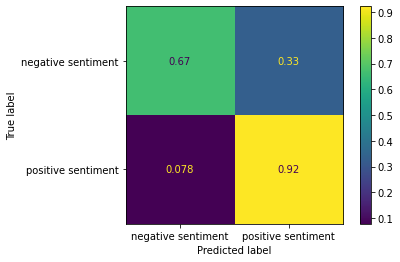

In [ ]:
class_names = ['negative sentiment','positive sentiment']
cm = confusion_matrix(actual_setiment, vader_modes,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp = disp.plot()

In [ ]:
episode_reviews